<a href="https://colab.research.google.com/github/ankitg-02/Credit-Card-Transaction-Analysis/blob/main/corporate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#importing data from excelsheet
corporate_sales=pd.read_excel("/content/Sample-sales-data-excel.xls")
data=pd.DataFrame(corporate_sales)
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
corporate_mod=data.groupby('Segment')
corporate_data=corporate_mod.get_group('Corporate')
corporate_data.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
5275,5276,CA-2017-147333,2017-12-14,2017-12-20,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Fayetteville,...,72701,South,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,159.800,4,0.0,70.3120
3621,3622,CA-2016-109743,2016-09-22,2016-09-29,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Smyrna,...,37167,South,TEC-PH-10004071,Technology,Phones,PayAnywhere Card Reader,63.936,8,0.2,5.5944
7003,7004,CA-2014-133158,2014-08-19,2014-08-21,Second Class,DW-13195,David Wiener,Corporate,United States,Los Angeles,...,90045,West,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,69.456,2,0.2,22.5732
1820,1821,CA-2016-168956,2016-02-16,2016-02-20,Standard Class,EA-14035,Erin Ashbrook,Corporate,United States,Chicago,...,60623,Central,OFF-AP-10004233,Office Supplies,Appliances,Honeywell Enviracaire Portable Air Cleaner for...,92.064,6,0.8,-225.5568
8067,8068,US-2015-160563,2015-10-20,2015-10-24,Standard Class,NS-18640,Noel Staavos,Corporate,United States,San Francisco,...,94109,West,TEC-AC-10002567,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,239.970,3,0.0,86.3892


In [4]:
corporate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3020 entries, 2 to 9988
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3020 non-null   int64         
 1   Order ID       3020 non-null   object        
 2   Order Date     3020 non-null   datetime64[ns]
 3   Ship Date      3020 non-null   datetime64[ns]
 4   Ship Mode      3020 non-null   object        
 5   Customer ID    3020 non-null   object        
 6   Customer Name  3020 non-null   object        
 7   Segment        3020 non-null   object        
 8   Country        3020 non-null   object        
 9   City           3020 non-null   object        
 10  State          3020 non-null   object        
 11  Postal Code    3020 non-null   int64         
 12  Region         3020 non-null   object        
 13  Product ID     3020 non-null   object        
 14  Category       3020 non-null   object        
 15  Sub-Category   3020 non-nu

In [5]:
for i in corporate_data.columns:
  print(i,':','\t',corporate_data[i].isnull().sum())

Row ID : 	 0
Order ID : 	 0
Order Date : 	 0
Ship Date : 	 0
Ship Mode : 	 0
Customer ID : 	 0
Customer Name : 	 0
Segment : 	 0
Country : 	 0
City : 	 0
State : 	 0
Postal Code : 	 0
Region : 	 0
Product ID : 	 0
Category : 	 0
Sub-Category : 	 0
Product Name : 	 0
Sales : 	 0
Quantity : 	 0
Discount : 	 0
Profit : 	 0


In [6]:
for i in corporate_data.columns:
  print(i,':','\n',corporate_data[i].unique())

Row ID : 
 [   3   22   23 ... 9967 9988 9989]
Order ID : 
 ['CA-2016-138688' 'CA-2016-137330' 'CA-2016-117590' ... 'CA-2015-141593'
 'CA-2016-146374' 'CA-2017-163629']
Order Date : 
 <DatetimeArray>
['2016-06-12 00:00:00', '2016-12-09 00:00:00', '2016-12-08 00:00:00',
 '2017-09-10 00:00:00', '2016-07-17 00:00:00', '2017-09-19 00:00:00',
 '2016-03-11 00:00:00', '2016-12-11 00:00:00', '2014-12-05 00:00:00',
 '2017-12-09 00:00:00',
 ...
 '2014-06-10 00:00:00', '2014-08-20 00:00:00', '2017-03-16 00:00:00',
 '2014-02-14 00:00:00', '2015-06-08 00:00:00', '2016-05-02 00:00:00',
 '2014-04-03 00:00:00', '2015-09-13 00:00:00', '2016-06-03 00:00:00',
 '2014-03-02 00:00:00']
Length: 830, dtype: datetime64[ns]
Ship Date : 
 <DatetimeArray>
['2016-06-16 00:00:00', '2016-12-13 00:00:00', '2016-12-10 00:00:00',
 '2017-09-15 00:00:00', '2016-07-22 00:00:00', '2017-09-23 00:00:00',
 '2016-03-13 00:00:00', '2016-12-17 00:00:00', '2014-12-10 00:00:00',
 '2017-12-11 00:00:00',
 ...
 '2017-03-21 00:00:00',

In [7]:
corporate_data.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,3020.000000,3020,3020,3020,3020,3020,3020,3020,3020,3020,...,3020.000000,3020,3020,3020,3020,3020,3020.000000,3020.000000,3020.000000,3020.000000
unique,NaN,1514,NaN,NaN,4,236,236,1,1,340,...,NaN,4,1456,3,17,1444,NaN,NaN,NaN,NaN
top,NaN,CA-2017-157987,NaN,NaN,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,NaN,West,FUR-CH-10002880,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,NaN,1812,32,32,3020,3020,266,...,NaN,960,8,1820,473,18,NaN,NaN,NaN,NaN
mean,5134.017881,NaN,2016-04-27 17:31:52.052980224,2016-05-01 17:42:50.066225152,NaN,NaN,NaN,NaN,NaN,NaN,...,54482.228477,NaN,NaN,NaN,NaN,NaN,233.823300,3.843709,0.158228,30.456667
min,3.000000,NaN,2014-01-06 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1453.000000,NaN,NaN,NaN,NaN,NaN,0.556000,1.000000,0.000000,-3839.990400
25%,2584.000000,NaN,2015-05-03 12:00:00,2015-05-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,22153.000000,NaN,NaN,NaN,NaN,NaN,17.469000,2.000000,0.000000,1.928400
50%,5340.500000,NaN,2016-07-02 00:00:00,2016-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,53209.000000,NaN,NaN,NaN,NaN,NaN,56.540000,3.000000,0.200000,8.694000
75%,7646.500000,NaN,2017-05-13 00:00:00,2017-05-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90004.000000,NaN,NaN,NaN,NaN,NaN,212.895000,5.000000,0.200000,29.843500
max,9989.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99207.000000,NaN,NaN,NaN,NaN,NaN,17499.950000,14.000000,0.800000,8399.976000


**Details about Corporate category**

In [8]:
corporate_data['Category'].value_counts()

,count
Category,
Office Supplies,1820
Furniture,646
Technology,554


**Exploratory Data Analysis**

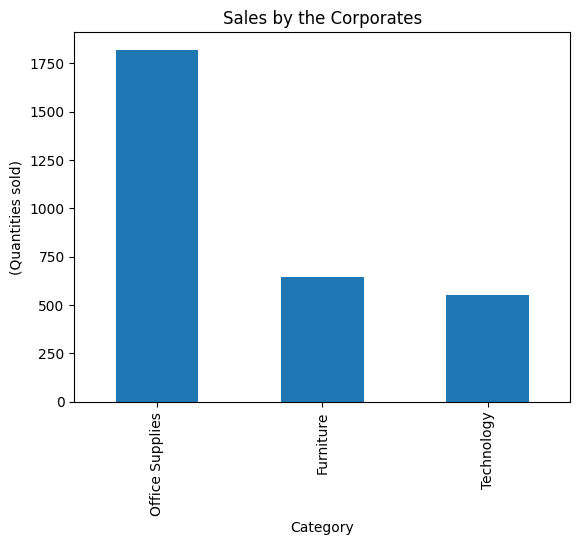

In [9]:
#sales of category items under Corporate segment
plt.xlabel("(Category)")
plt.ylabel("(Quantities sold)")
corporate_data['Category'].value_counts().plot(kind='bar')
plt.title("Sales by the Corporates")
plt.show()

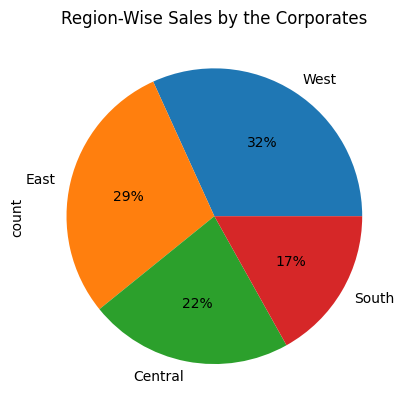

In [10]:
#distirbution of sales pattern about the region by the Corporate category
corporate_data['Region'].value_counts().plot(kind="pie",autopct='%1.0f%%')
plt.title("Region-Wise Sales by the Corporates")
plt.show()

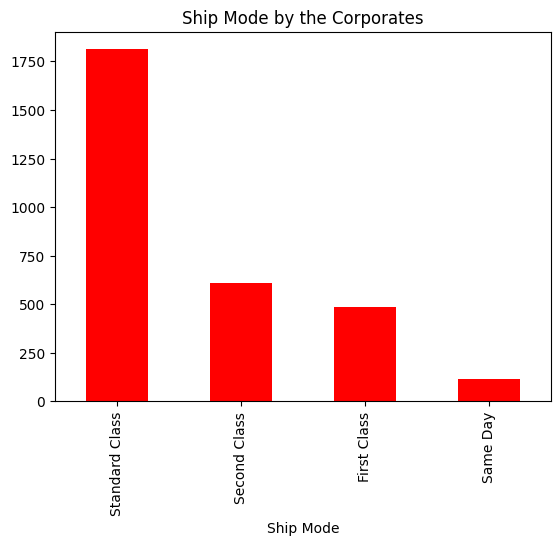

In [11]:
#Shipping mode of items ordered by Corporate segment
corporate_data['Ship Mode'].value_counts().plot(kind='bar',color='red')
plt.title("Ship Mode by the Corporates")
plt.show()

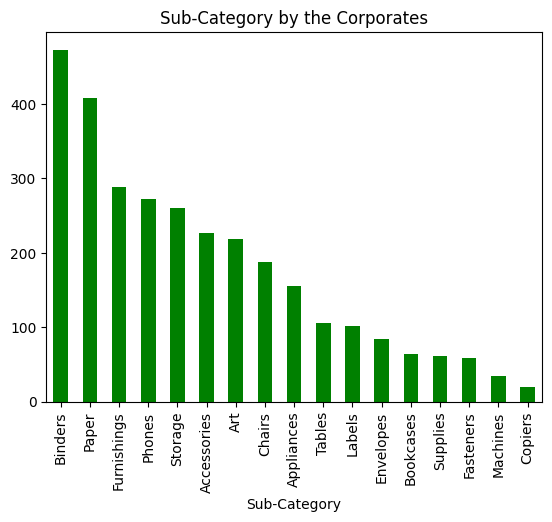

In [12]:
#sub-category items ordered by the Corporate segment
corporate_data['Sub-Category'].value_counts().plot(kind='bar',color='green')
plt.title("Sub-Category by the Corporates")
plt.show()

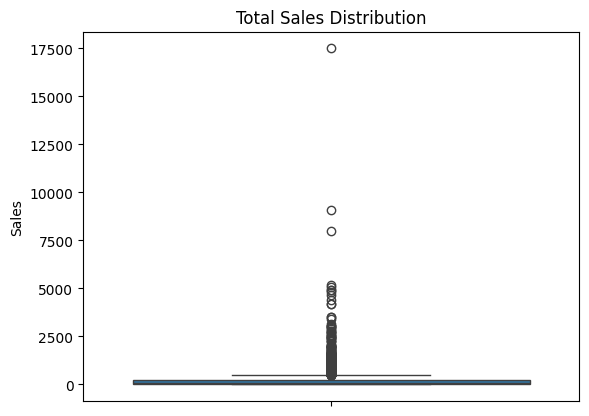

In [13]:
#sales pattern distribution
sns.boxplot(corporate_data['Sales'])
plt.title("Total Sales Distribution")
plt.show()

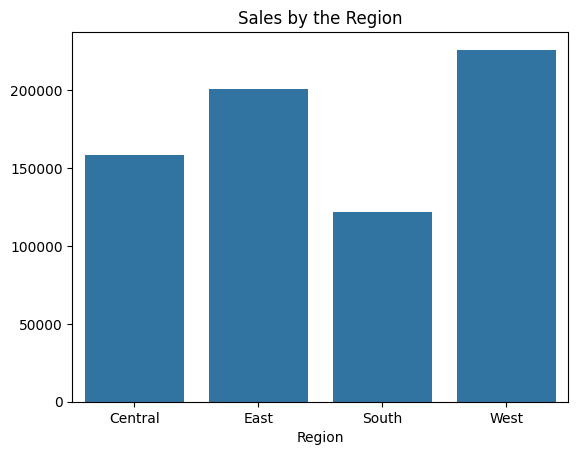

In [14]:
#sales distribution pattern region-wise
sales_region=corporate_data.groupby('Region')['Sales'].sum()
sns.barplot(x=sales_region.index,y=sales_region.values)
plt.title("Sales by the Region")
plt.show()

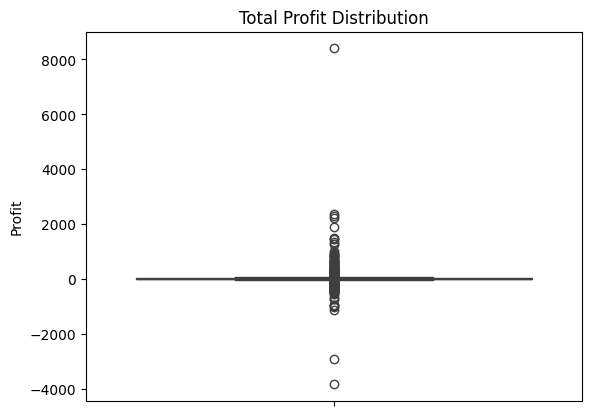

In [15]:
#profit pattern distribution
sns.boxplot(corporate_data['Profit'])
plt.title("Total Profit Distribution")
plt.show()

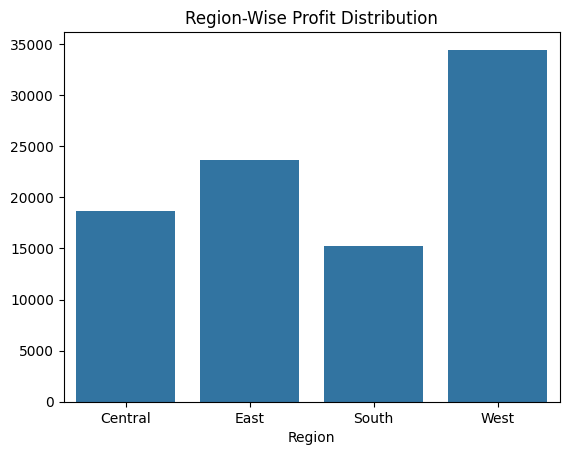

In [16]:
#profit pattern distribution
profit_by_region=corporate_data.groupby('Region')['Profit'].sum()
sns.barplot(y=profit_by_region.values,x=profit_by_region.index)
plt.title("Region-Wise Profit Distribution")
plt.show()

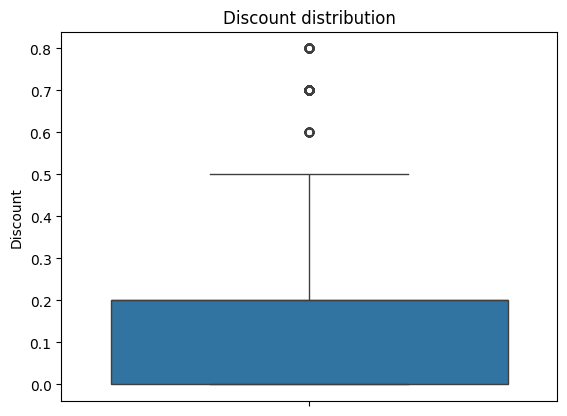

In [17]:
#discount pattern distribution
sns.boxplot(corporate_data['Discount'])
plt.title("Discount distribution")
plt.show()

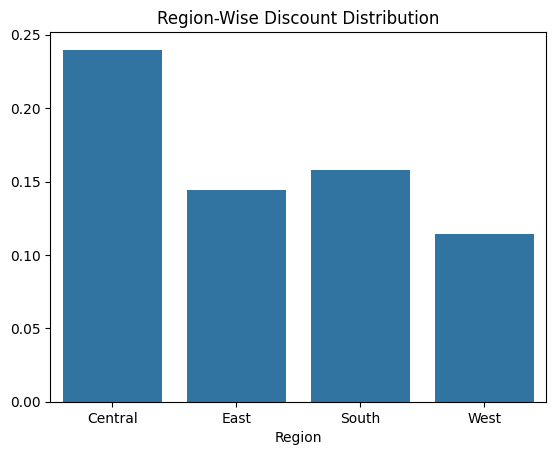

In [18]:
#discount pattern distribution
discount_by_region=corporate_data.groupby('Region')['Discount'].mean()
sns.barplot(y=discount_by_region.values,x=discount_by_region.index)
plt.title("Region-Wise Discount Distribution")
plt.show()

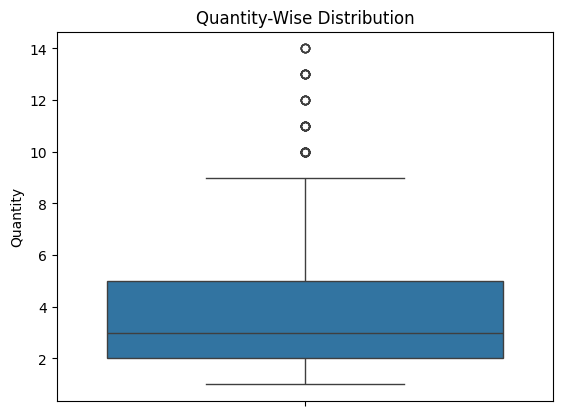

In [19]:
#quantity pattern distribution
sns.boxplot(corporate_data['Quantity'])
plt.title("Quantity-Wise Distribution")
plt.show()

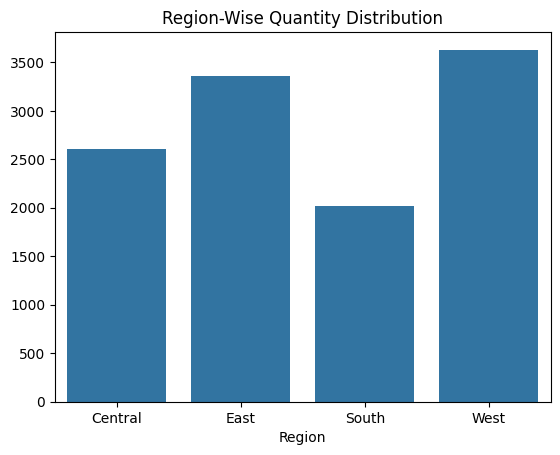

In [20]:
#quantity pattern distribution
quantity_by_region=corporate_data.groupby('Region')['Quantity'].sum()
sns.barplot(y=quantity_by_region.values,x=quantity_by_region.index)
plt.title("Region-Wise Quantity Distribution")
plt.show()

In [21]:
oe=OrdinalEncoder()
corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
corporate_data['City']=oe.fit_transform(corporate_data[['City']])
corporate_data['State']=oe.fit_transform(corporate_data[['State']])
corporate_data['Region']=oe.fit_transform(corporate_data[['Region']])
corporate_data['Category']=oe.fit_transform(corporate_data[['Category']])
corporate_data['Sub-Category']=oe.fit_transform(corporate_data[['Sub-Category']])
corporate_data['Segment']=oe.fit_transform(corporate_data[['Segment']])
corporate_data['Country']=oe.fit_transform(corporate_data[['Country']])

<ipython-input-21-80ffab47515d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['Ship Mode']=oe.fit_transform(corporate_data[['Ship Mode']])
<ipython-input-21-80ffab47515d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corporate_data['City']=oe.fit_transform(corporate_data[['City']])
<ipython-input-21-80ffab47515d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [22]:
corporate_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,2.0,DV-13045,Darrin Van Huff,0.0,0.0,168.0,...,90036,3.0,OFF-LA-10000240,1.0,10.0,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
21,22,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AR-10000246,1.0,2.0,Newell 318,19.460,7,0.0,5.0596
22,23,CA-2016-137330,2016-12-09,2016-12-13,3.0,KB-16585,Ken Black,0.0,0.0,106.0,...,68025,0.0,OFF-AP-10001492,1.0,1.0,"Acco Six-Outlet Power Strip, 4' Cord Length",60.340,7,0.0,15.6884
35,36,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,TEC-PH-10004977,2.0,13.0,GE 30524EE4,1097.544,7,0.2,123.4737
36,37,CA-2016-117590,2016-12-08,2016-12-10,0.0,GH-14485,Gene Hale,0.0,0.0,262.0,...,75080,0.0,FUR-FU-10003664,0.0,9.0,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.920,5,0.6,-147.9630


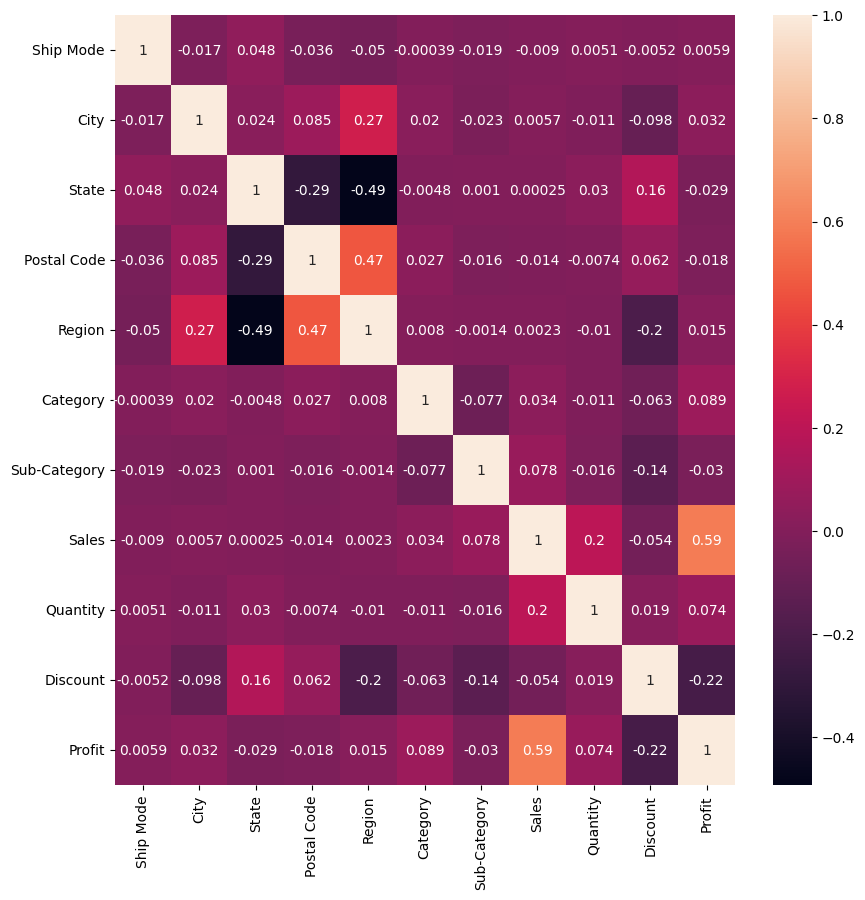

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1).corr(),annot=True)
plt.show()

In [24]:
mod_corporate_data=pd.DataFrame(corporate_data.drop(columns=['Row ID','Order ID','Order Date','Ship Date','Customer ID','Customer Name','Country','Segment','Product ID','Product Name'],axis=1))
mod_corporate_data.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,2.0,168.0,3.0,90036,3.0,1.0,10.0,14.620,2,0.0,6.8714
21,3.0,106.0,24.0,68025,0.0,1.0,2.0,19.460,7,0.0,5.0596
22,3.0,106.0,24.0,68025,0.0,1.0,1.0,60.340,7,0.0,15.6884
35,0.0,262.0,39.0,75080,0.0,2.0,13.0,1097.544,7,0.2,123.4737
36,0.0,262.0,39.0,75080,0.0,0.0,9.0,190.920,5,0.6,-147.9630


In [25]:
#splitting the dataset
x=mod_corporate_data.drop(columns=['Sales','Profit'],axis='1')
y=mod_corporate_data['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


**Linear Regression**

In [40]:
le=LinearRegression()
le.fit(x_train,y_train)
le.score(x_test,y_test)

-0.009873765105608445

In [41]:
y_pred=le.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
y_pred

362018.3293661339
-0.15170778387630368


array([[-1.38848134e-03],
       [ 1.21454769e-02],
       [ 1.51014521e-02],
       [ 8.22284778e-03],
       [ 1.05731766e-02],
       [ 2.07949617e-02],
       [ 4.82065784e-03],
       [ 7.49113712e-03],
       [ 1.84658562e-02],
       [ 8.14274735e-03],
       [ 4.31258250e-04],
       [ 3.11656370e-02],
       [ 1.18015515e-02],
       [ 7.19004959e-03],
       [ 7.18059489e-03],
       [ 1.35296240e-02],
       [ 2.54485416e-03],
       [ 1.34165610e-02],
       [ 2.42241779e-02],
       [ 9.24727747e-03],
       [ 1.22972485e-03],
       [ 1.26599853e-02],
       [ 3.50350911e-02],
       [ 1.52206667e-02],
       [ 4.20542400e-02],
       [ 1.94422265e-02],
       [ 1.22584243e-02],
       [ 9.08016543e-03],
       [ 6.88739219e-04],
       [ 1.71797078e-02],
       [ 2.01072075e-02],
       [ 2.07654378e-02],
       [ 1.76643179e-02],
       [ 9.20195647e-03],
       [ 1.04872300e-02],
       [ 9.81434153e-03],
       [ 2.40373128e-02],
       [ 1.16148427e-02],
       [ 5.4

In [47]:
predicted_df=np.concatenate((x_test,y_pred),axis=1)
predicted_df=pd.DataFrame(predicted_df,columns=('Ship Mode','City','State','Postal Code','Region','Category','Sub-Category','Quantity','Discount','Predicted Sales'))
predicted_df.head()

,Ship Mode,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Predicted Sales
0,2.0,57.0,10.0,60610.0,0.0,1.0,1.0,2.0,0.8,-0.001388
1,1.0,106.0,24.0,68025.0,0.0,1.0,14.0,2.0,0.0,0.012145
2,3.0,83.0,19.0,48205.0,0.0,0.0,16.0,3.0,0.0,0.015101
3,0.0,141.0,7.0,32216.0,2.0,1.0,12.0,2.0,0.2,0.008223
4,3.0,182.0,31.0,44256.0,1.0,0.0,4.0,5.0,0.5,0.010573


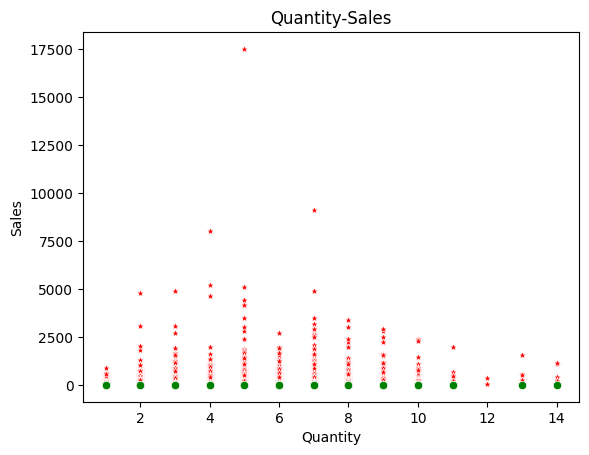

In [51]:
sns.scatterplot(x=mod_corporate_data['Quantity'],y=mod_corporate_data['Sales'],color='red',marker='*')
sns.scatterplot(x=predicted_df['Quantity'],y=predicted_df['Predicted Sales'],color='green')
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Quantity-Sales")
plt.show()